In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# local_people = pd.read_excel("./output/지역별_퇴사자3.xlsx")
# local_people = local_people.iloc[:, [0, -9, -8, -7]]
# local_people = local_people.rename(
#     columns={"2020.1": "경력", "2020.2": "입사경험", "2020.3": "신입"})
# local_people = local_people.drop(index=0)
# list = local_people.iloc[1:, 3]
# new = []
# for i in range(len(list)):
#     num_str = list.iloc[i].replace(",", "")
#     # print(num_str)
#     new.append(int(num_str))
# new

In [3]:
p = pd.read_excel("./input/연령별인구현황_2020.xlsx", skiprows=4)
list = p.iloc[:, 3]
data = []
for i in range(len(p)):
    num = list.iloc[i].replace(",", "")
    data.append(int(num))
data[5]+=data[7]
del data[7]
data

c:\Users\dawoo\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[7231209,
 2461682,
 1751119,
 2171715,
 1033715,
 1307986,
 838950,
 9782084,
 1080135,
 1132221,
 1459144,
 1224104,
 1232578,
 1827700,
 2359396,
 469839]

In [4]:
local_people = pd.read_excel("./output/지역별_퇴사자3.xlsx")
local_people = local_people.iloc[:, [0, -9, -8, -7]]
local_people = local_people.rename(
    columns={"2020.1": "경력", "2020.2": "입사경험", "2020.3": "신입"})
local_people = local_people.drop(index=0)
list = local_people.iloc[1:, 3]
new_2020 = []
for i in range(len(list)):
    num_str = list.iloc[i].replace(",", "")
    # print(num_str)
    new_2020.append(int(num_str)/data[i]*100)
new_2020

[0.10371709626979389,
 0.07519249033790718,
 0.09513916529944567,
 0.1623141158024879,
 0.0198313848594632,
 0.15000160552177164,
 0.22575838846176768,
 0.12241767705122956,
 0.046383091002513574,
 0.2807755729667618,
 0.23534346164600617,
 0.08299948370399901,
 0.05273499932661463,
 0.03912020572303988,
 0.35966832189255216,
 0.015750076089894625]

In [8]:
reward = pd.read_excel("./input/2020/업무_관련_동의_정도_2020.xlsx")
not_reasonable1 = reward.iloc[11:28, 6:8].sum(axis=1)

nrl1 = []
for i in range(len(not_reasonable1)):
    result = not_reasonable1.iloc[i]
    # print(result)
    nrl1.append(result)
# nrl1
nrl1[5] += nrl1[7]
del nrl1[7]

nrl1

[10.8,
 16.0,
 14.100000000000001,
 14.5,
 18.3,
 22.7,
 17.0,
 13.9,
 21.0,
 16.4,
 19.0,
 16.0,
 21.599999999999998,
 17.3,
 16.1,
 29.4]

In [6]:
# reward = pd.read_excel("./input/2020/업무_관련_동의_정도_2020.xlsx")
# total_reward = reward.iloc[11:28, 2]
# reasonable1=reward.iloc[11:28,3]


# nrl2 = []
# for i in range(len(total_reward)):
#     result=int((total_reward.iloc[i]*reasonable1.iloc[i])/100+0.5)
#     # print(result)
#     nrl2.append(result)
# # nrl1
# nrl2[5]+=nrl2[7]
# del nrl2[7]

# nrl2
# # sample



In [9]:
df_high = pd.DataFrame({"적절한_보상_없음": nrl1, "신입_퇴사자": new_2020})


X = df_high["적절한_보상_없음"]
y = df_high["신입_퇴사자"]

correlation_not_reasonable_reward = X.corr(y)

# print(mean)
# print(df)
print(f"적절한 보상이 없는 것과 신입 퇴사자의 상관관계 : {correlation_not_reasonable_reward}")
df_high

적절한 보상이 없는 것과 신입 퇴사자의 상관관계 : -0.29414302015451865


,적절한_보상_없음,신입_퇴사자
0,10.8,0.103717
1,16.0,0.075192
2,14.1,0.095139
3,14.5,0.162314
4,18.3,0.019831
5,22.7,0.150002
6,17.0,0.225758
7,13.9,0.122418
8,21.0,0.046383
9,16.4,0.280776


<Axes: xlabel='적절한_보상_없음', ylabel='퇴사율'>

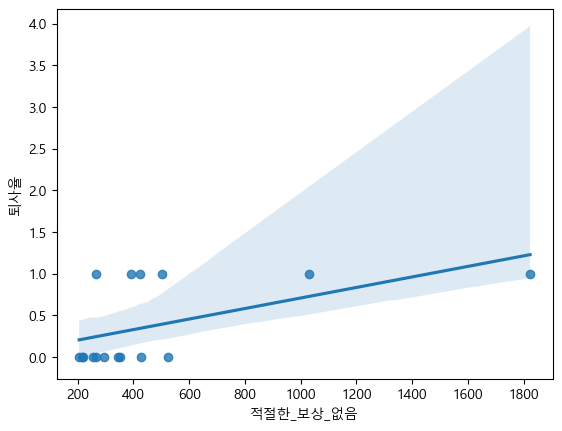

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
sns.regplot(x=df_high["적절한_보상_없음"], y=df_high['퇴사율'])

In [37]:
mean = int(pd.Series(new).mean()+0.5)

df_low = pd.DataFrame({"적절한_보상_있음": nrl2, "신입_퇴사자": new})
df_low["퇴사율"] = (df_low["신입_퇴사자"] < mean).astype(int)

X = df_low["적절한_보상_있음"]
y = df_low["퇴사율"]

correlation_not_reasonable_reward = X.corr(y)


print(f"적절한 보상이 있는 것과 신입 퇴사자의 상관관계 : {correlation_not_reasonable_reward}")


적절한 보상이 있는 것과 신입 퇴사자의 상관관계 : -0.5537861999948858


<Axes: xlabel='적절한_보상_있음', ylabel='퇴사율'>

c:\Users\dawoo\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\dawoo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


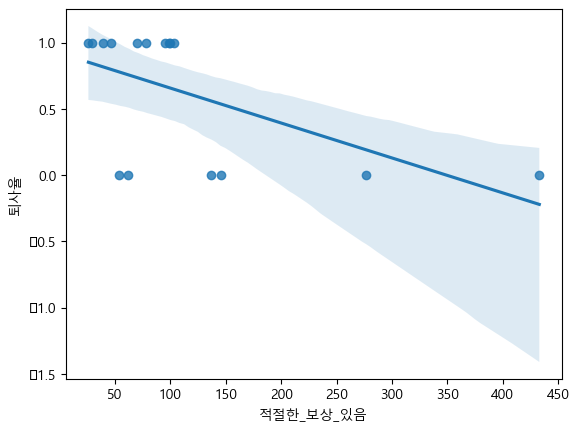

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
sns.regplot(x=df_low['적절한_보상_있음'], y=df_low['퇴사율'])